In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

This project aims to predict the churn of a Telecom Company's customers. We will use Classification algorithms to do this.

# **Exploring the dataset**

In [ ]:
df = pd.read_excel("/content/telecom_churn.xlsx")

In [ ]:
df.shape

(3333, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Variables description :   
**Churn** : 1 if customer cancelled service, 0 if not   
**AccountWeeks** : number of weeks customer has had active account  
**ContractRenewal** : 1 if customer recently renewed contract, 0 if not    
**DataPlan** : 1 if customer has data plan, 0 if not   
**DataUsage** : gigabytes of monthly data usage   
**CustServCalls** : number of calls into customer service   
**DayMins** : average daytime minutes per month   
**DayCalls** : average number of daytime calls   
**MonthlyCharge** : average monthly bill   
**OverageFee** : largest overage fee in last 12 months   
**RoamMins** : average number of roaming minutes  

In [ ]:
df_exclude_ = df.drop(columns=['Churn', 'DataPlan','ContractRenewal'])
df_exclude_.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
df.groupby('Churn').sum()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,287262,2664,842,2457.13,4132,499250.9,285807,159076.3,28370.66,28952.8
1,49587,346,80,264.18,1077,99939.5,48945,28588.8,5130.95,5168.1


In [ ]:
df.groupby('ContractRenewal').sum()

,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
ContractRenewal,,,,,,,,,,
0,137,33615,92,287.84,473,60719.8,32515,18952.4,3294.39,3432.9
1,346,303234,830,2433.47,4736,538470.6,302237,168712.7,30207.22,30688.0


In [ ]:
df.groupby('DataPlan').sum()

,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
DataPlan,,,,,,,,,,
0,403,243494,2180,173.80,3803,433574.5,242482,117693.0,24152.77,24687.6
1,80,93355,830,2547.51,1406,165615.9,92270,69972.1,9348.84,9433.3


## **Data Visualization**

<Axes: xlabel='ContractRenewal', ylabel='count'>

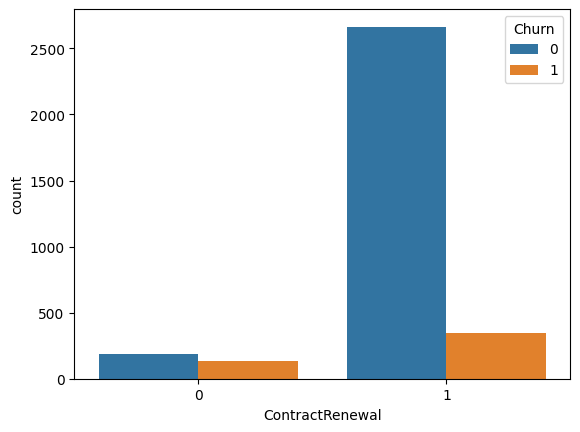

In [ ]:
sns.countplot(x="ContractRenewal", hue="Churn", data=df)

Most of the clients who renewed their contracts didn't cancel the service.


# **Models** :

In [ ]:
matrix = df.corr()
print(matrix)

                    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCa

Text(0.5, 1.0, 'Heat Map')

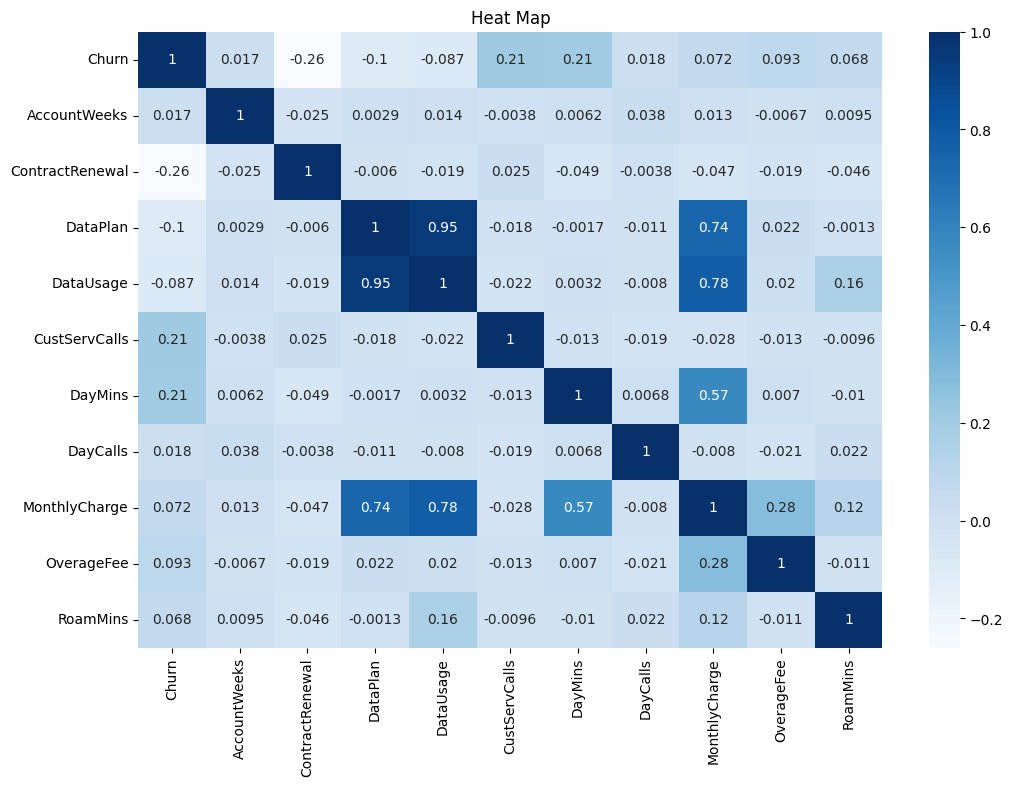

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, cmap='Blues', annot = True)
plt.title('Heat Map')

Text(0.5, 1.0, 'Heat Map')

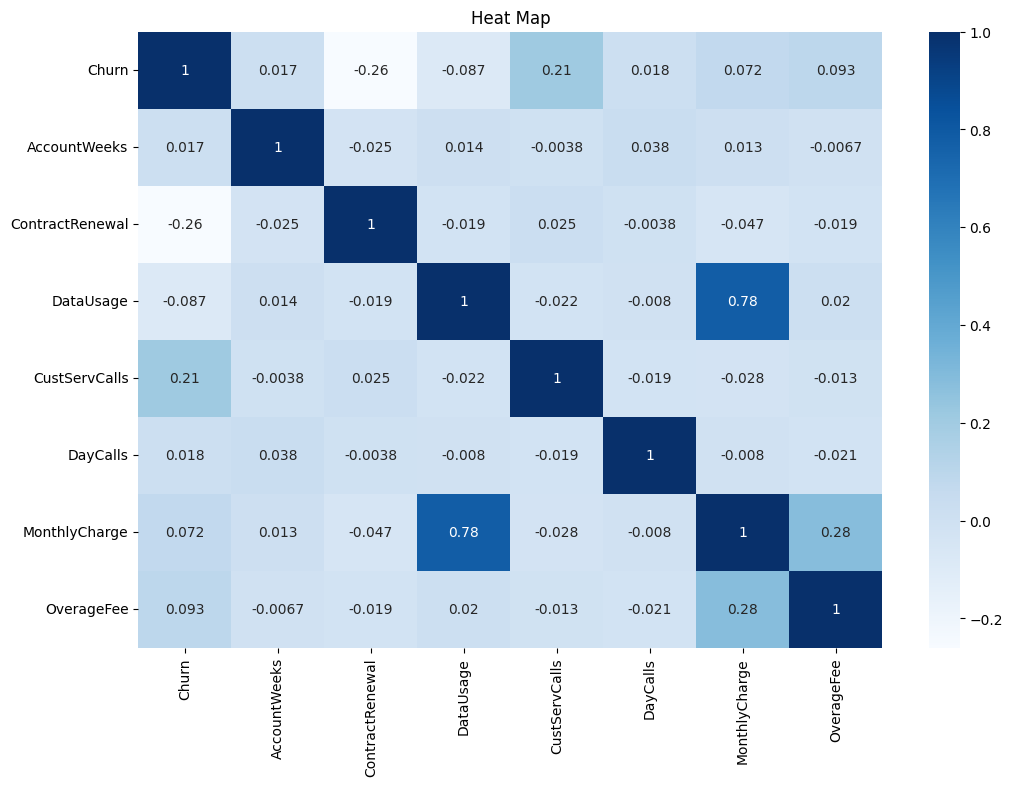

In [ ]:
new_df = df.drop(columns = ['DataPlan','RoamMins','DayMins'])
matrix_ = new_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_, cmap='Blues', annot = True)
plt.title('Heat Map')

## **Logistic Regression**

In [ ]:
# Creating the variables X and the target y :
X, y = new_df.drop(['Churn'], axis=1), new_df['Churn']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Training the model

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE: ", rmse)

MSE: 0.15292353823088456
RMSE:  0.3910543929313217


In [ ]:
accuracy_lr = model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8470764617691154


Confusion Matrix:
 [[547  19]
 [ 83  18]]


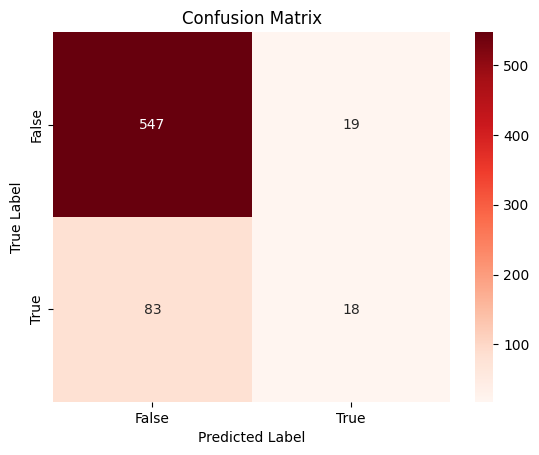

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

We have 547+18 = 565 correct predictions, and 19+83 = 102 incorrect predictions on our test dataset. So **84.70%** of total predictions are **correct**

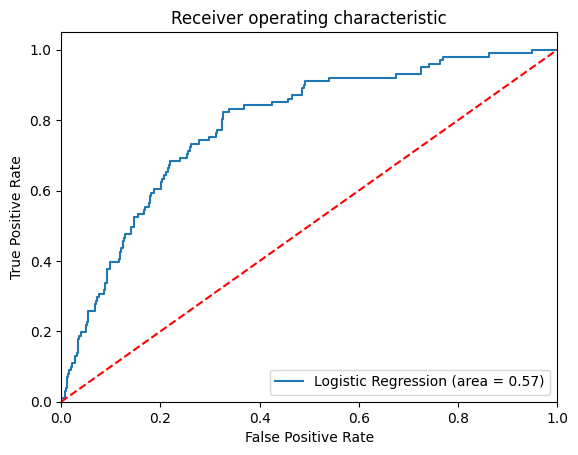

In [ ]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("MSE :", mse, "RMSE :", rmse)

MSE : 0.08845577211394302 RMSE : 0.29741515111699174


In [ ]:
accuracy_rf = rf.score(X_test,y_test)
print("Random Forest accuracy is :",accuracy_rf)

Random Forest accuracy is : 0.9115442278860569


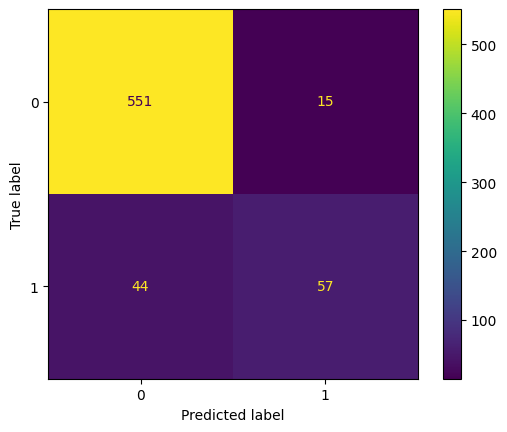

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

We have 608 correct predictions and 59 uncorrect ones. Which is better than the outcomes of the Logistic Regression.

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
random_state = 42

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(X_test)

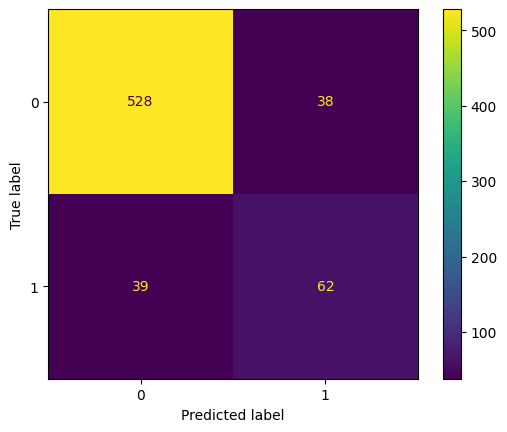

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt)).plot();

We have 528+62 = 590 correct predictions and 38+39 = 77 uncorrect predictions.  
So **88.45%** of predictions are **correct** and **11.54%** of predictions are **not correct**.

In [ ]:
mse = mean_squared_error(y_pred_dt,y_test)
rmse = np.sqrt(mse)
print("MSE :",mse, "RMSE :", rmse)

MSE : 0.11544227886056972 RMSE : 0.3397679779799293


In [ ]:
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8845577211394303


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_gb = nb.predict(X_test)
mse = mean_squared_error(y_pred_gb,y_test)
rmse = np.sqrt(mse)
print("MSE :",mse, "RMSE :", rmse)

MSE : 0.1679160419790105 RMSE : 0.40977559954078585


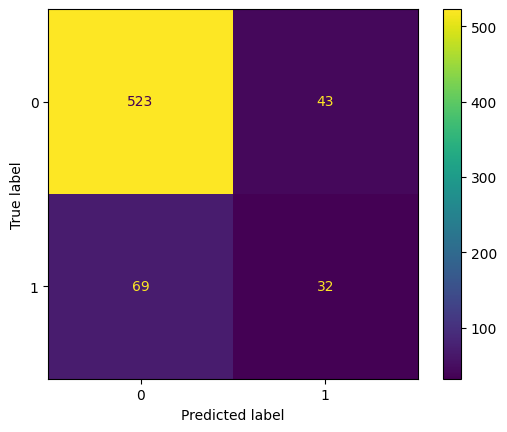

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_gb)).plot();

555 correct predictions and 112 uncorrect predictions

In [ ]:
accuracy_gb = nb.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_gb)

Naive Bayes accuracy is : 0.8320839580209896


## **XG Boost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

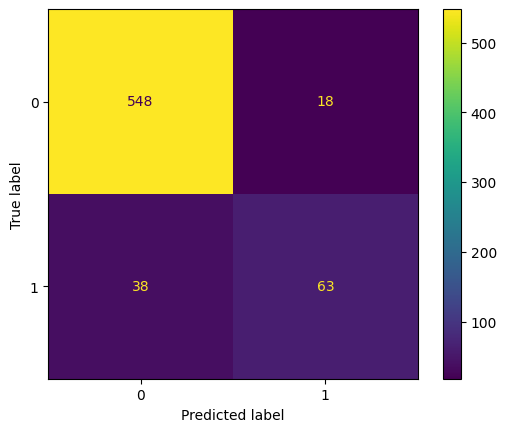

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb)).plot();

611 correct predictions    
56 uncorrect predictions

In [ ]:
mse = mean_squared_error(y_pred_xgb, y_test)
rmse = np.sqrt(mse)
print("MSE :", mse, "RMSE :", rmse)

MSE : 0.08395802098950525 RMSE : 0.2897551052000728


In [ ]:
accuracy_xgb = xgb_model.score(X_test,y_test)
print("XGBoost accuracy is :",accuracy_xgb)

XGBoost accuracy is : 0.9160419790104948


## **Comparing the models' performance**

In [ ]:
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Naive Bayes", "XGBoost"]
mse = [0.15292353823088456,0.08845577211394302,0.10794602698650675 ,0.1679160419790105,0.08395802098950525]
rmse = [0.3910543929313217,0.29741515111699174,0.3285514069160361,0.40977559954078585, 0.2897551052000728]
accuracy = [0.8470764617691154,0.9115442278860569,0.8845577211394303,0.8320839580209896,0.9160419790104948]

In [ ]:
d = pd.DataFrame({'Model':models, 'MSE':mse, 'RMSE':rmse, 'Accuracy':accuracy})
d.head()

,Model,MSE,RMSE,Accuracy
0,Logistic Regression,0.083958,0.289755,0.847076
1,Random Forest,0.083958,0.289755,0.911544
2,Decision Tree,0.083958,0.289755,0.884558
3,Naive Bayes,0.083958,0.289755,0.832084
4,XGBoost,0.083958,0.289755,0.916042


From all the above (RMSE, confusion_matrix..) we can say the model XG Boost is the best in our dataset.

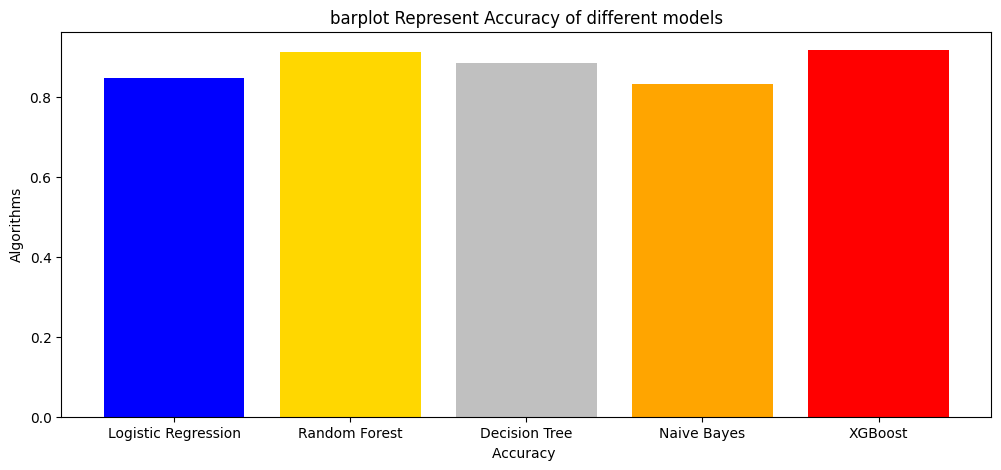

In [ ]:
colors = ['blue','gold','silver','orange','red',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy ")
plt.ylabel("Algorithms")
plt.bar(d['Model'],d['Accuracy'],color = colors)
plt.show()